In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_id = pd.read_csv("D://Downloads//ieee-fraud-detection//train_identity.csv")

In [3]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [4]:
df_id = reduce_mem_usage(df_id)

Mem. usage decreased to 25.86 Mb (42.7% reduction)


In [5]:
df_trans = pd.read_csv("D://Downloads//ieee-fraud-detection//train_transaction.csv")

In [6]:
df_trans = reduce_mem_usage(df_trans)

Mem. usage decreased to 542.35 Mb (69.4% reduction)


In [7]:
df_trans_test = pd.read_csv("D://Downloads//ieee-fraud-detection//test_transaction.csv")

In [8]:
df_trans_test = reduce_mem_usage(df_trans_test)

Mem. usage decreased to 472.59 Mb (68.9% reduction)


In [9]:
df_id_test = pd.read_csv("D://Downloads//ieee-fraud-detection//test_identity.csv")

In [10]:
df_id_test = reduce_mem_usage(df_id_test)

Mem. usage decreased to 25.31 Mb (43.0% reduction)


In [11]:
train = pd.merge(df_trans, df_id, on='TransactionID', how='left')
test = pd.merge(df_trans_test, df_id_test, on='TransactionID', how='left')

In [12]:
del df_trans , df_id , df_trans_test , df_id_test

In [13]:
##MISSING VALUES TOP 20 ATTRIBUTES IN TRAIN
all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:100]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
id_24,99.196159
id_25,99.130965
id_07,99.127070
id_08,99.127070
id_21,99.126393
id_26,99.125715
id_22,99.124699
id_23,99.124699
id_27,99.124699
dist2,93.628374


In [14]:
##MISSING VALUES TOP 20 ATTRIBUTES IN TEST
all_data_na_t = (test.isnull().sum() / len(test)) * 100
all_data_na_t = all_data_na_t.drop(all_data_na_t[all_data_na_t == 0].index).sort_values(ascending=False)[:100]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
id_24,99.196159
id_25,99.130965
id_07,99.127070
id_08,99.127070
id_21,99.126393
id_26,99.125715
id_22,99.124699
id_23,99.124699
id_27,99.124699
dist2,93.628374


Text(0.5, 1.0, 'Percent missing data by feature')

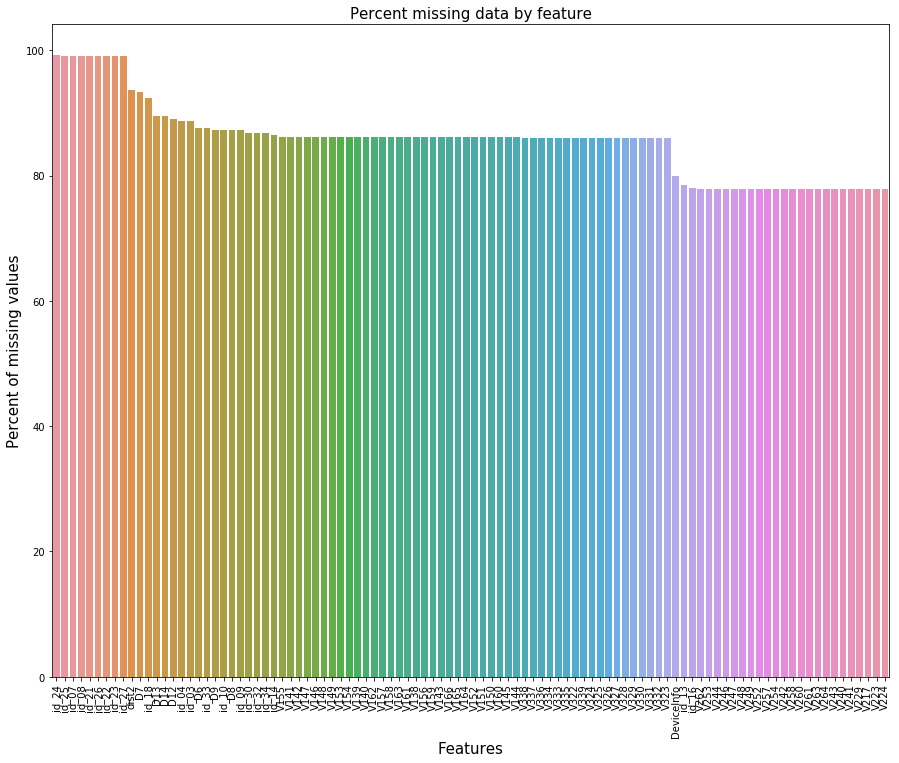

In [15]:
##GRAPH OF MISSING VALUES of 100 attributes train data
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

Text(0.5, 1.0, 'Percent missing data by feature')

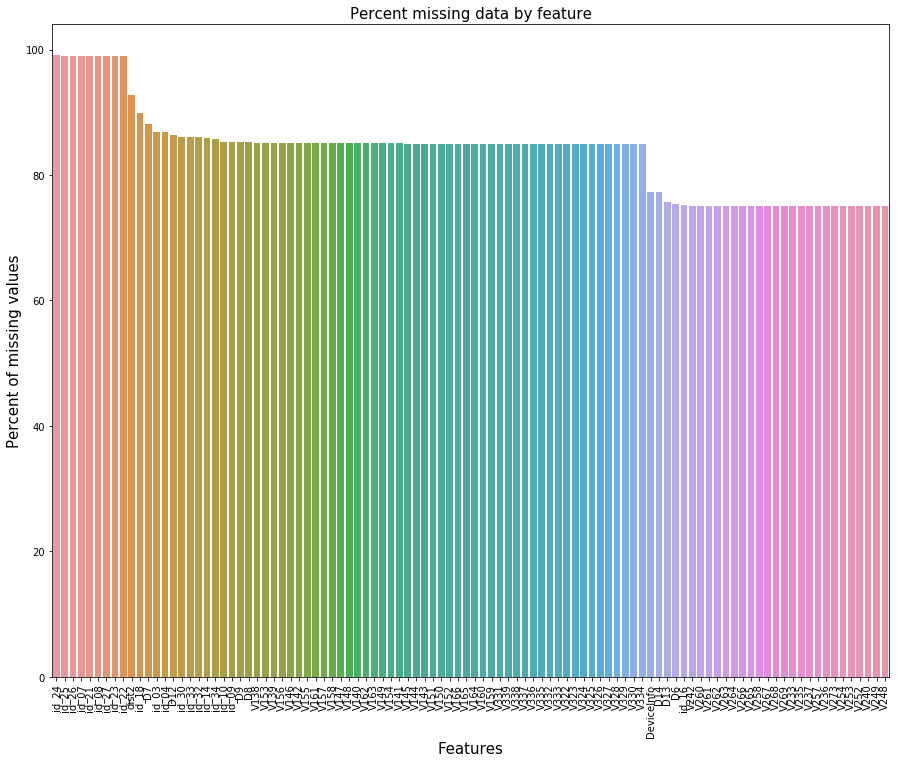

In [16]:
##GRAPH OF MISSING VALUES in Test
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na_t.index, y=all_data_na_t)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [17]:
# We will find and remove all columns with more than 90 percent of similar data
many_null_cols = [col for col in train.columns if train[col].isnull().sum() / train.shape[0] > 0.9]
many_null_cols_test = [col for col in test.columns if test[col].isnull().sum() / test.shape[0] > 0.9]

In [18]:
# We will find and remove all columns with more than 90 percent of values as same 
big_top_value_cols = [col for col in train.columns if train[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]
big_top_value_cols_test = [col for col in test.columns if test[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]

In [19]:
cols_to_drop = list(set(many_null_cols + many_null_cols_test + big_top_value_cols + big_top_value_cols_test ))
cols_to_drop.remove('isFraud')
len(cols_to_drop)

82

In [20]:
train = train.drop(cols_to_drop, axis=1)
test = test.drop(cols_to_drop, axis=1)

In [21]:
##FILLING MISSING VALUES which have more than 70% as one  value
count=0
mode_cat = []
for f in train.drop('isFraud', axis=1).columns:
    if train[f].dtype=='object':
        if train[f].value_counts(dropna=False, normalize=True).values[0] > 0.7:
            train[f] = train[f].fillna(train[f].mode()[0])
            test[f] = test[f].fillna(test[f].mode()[0])
            count=count+1
            print(count)
            mode_cat.append(f)
    else: continue

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [22]:
print(mode_cat)

['ProductCD', 'card6', 'R_emaildomain', 'id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']


In [23]:
count=0
tot_cat = []
for f in train.drop('isFraud', axis=1).columns:
    if train[f].dtype=='object':
        if train[f].value_counts(dropna=False, normalize=True).values[0] <= 0.7:
            train[f] = train[f].fillna("None")
            test[f] = test[f].fillna("None")
            print(count)
            count = count+1
            tot_cat.append(f)
    else: continue

0
1
2
3
4
5
6
7
8
9
10


In [24]:
count=0
tot_num = []
for f in train.drop('isFraud', axis=1).columns:
    if train[f].dtype!='object':
        print(count)
        count = count+1
        tot_num.append(f)
    else: continue

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [25]:
print(tot_num)

['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V87', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V99', 'V100', 'V126', 'V127', 'V128', 'V130', 'V131', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V

In [26]:
# transforming numerical variables that are actually  categorical
card_cols = [c for c in train.columns if 'id' in c]
test_id = [ 'id_13', 'id_14', 'id_17', 'id_19', 'id_20', 'id_32']
for c in card_cols:
    if c in test_id:
        print(c)
        train[c]= train[c].apply(str)
    
for c in card_cols:
    if c in test_id:
        train[c]= train[c].fillna("None")

id_13
id_14
id_17
id_19
id_20
id_32


In [27]:
test_id = [ 'id_13', 'id_14', 'id_17', 'id_19', 'id_20', 'id_32']
card_cols = [c for c in test.columns if 'id' in c]

for c in card_cols:
    if c in test_id:
        test[c]= test[c].apply(str)
        
        
for c in card_cols:
    if c in test_id:
        test[c]= test[c].fillna("None")

In [28]:
cards = [c for c in train.columns if 'card' in c]
for c in cards:
    if c in tot_num:
        print(c)
        train[c]=train[c].apply(str)
        test[c]=test[c].apply(str)
for c in cards:
    if c in tot_num:
        train[c]=train[c].fillna("None")
        test[c]=test[c].fillna("None")

card1
card2
card3
card5


In [29]:
address = [c for c in train.columns if 'addr' in c]
for c in address:
    if c in tot_num:
        train[c]=train[c].apply(str)
        test[c]=test[c].apply(str)
        print(c)

for c in address:
    if c in tot_num:
        train[c]=train[c].fillna("None")
        test[c]=test[c].fillna("None")

addr1
addr2


In [30]:
for f in train.drop('isFraud', axis=1).columns:
    if train[f].dtype=='object':
        print(f)

ProductCD
card1
card2
card3
card4
card5
card6
addr1
addr2
P_emaildomain
R_emaildomain
M1
M2
M3
M4
M5
M6
M7
M8
M9
id_12
id_13
id_14
id_15
id_16
id_17
id_19
id_20
id_28
id_29
id_30
id_31
id_32
id_33
id_34
id_35
id_36
id_37
id_38
DeviceType
DeviceInfo


In [31]:
for f in ['id_01','id_02','id_03','id_04','id_05','id_06','id_09','id_10','id_11']:
    if train[f].dtype!='object':
        train[f]=train[f].fillna(0)
        test[f]=test[f].fillna(0)
        

In [32]:
lol = ['id_01','id_02','id_03','id_04','id_05','id_06','id_09','id_10','id_11']

for f in train.drop('isFraud', axis=1).columns:
    if f not in lol:
        if train[f].dtype!='object':
            train[f] = train[f].fillna(0)
            test[f] = test[f].fillna(0)

In [33]:
# I checked all the important features when i first ran the model so mixing them to create new features
train['TransactionAmt_to_mean_card1'] = train['TransactionAmt'] / train.groupby(['card1'])['TransactionAmt'].transform('mean')
train['TransactionAmt_to_mean_card2'] = train['TransactionAmt'] / train.groupby(['card2'])['TransactionAmt'].transform('mean')
train['TransactionAmt_to_std_card1'] = train['TransactionAmt'] / train.groupby(['card1'])['TransactionAmt'].transform('std')
train['TransactionAmt_to_std_card2'] = train['TransactionAmt'] / train.groupby(['card2'])['TransactionAmt'].transform('std')

test['TransactionAmt_to_mean_card1'] = test['TransactionAmt'] / test.groupby(['card1'])['TransactionAmt'].transform('mean')
test['TransactionAmt_to_mean_card2'] = test['TransactionAmt'] / test.groupby(['card2'])['TransactionAmt'].transform('mean')
test['TransactionAmt_to_std_card1'] = test['TransactionAmt'] / test.groupby(['card1'])['TransactionAmt'].transform('std')
test['TransactionAmt_to_std_card2'] = test['TransactionAmt'] / test.groupby(['card2'])['TransactionAmt'].transform('std')

train['id_02_to_mean_card1'] = train['id_02'] / train.groupby(['card1'])['id_02'].transform('mean')
train['id_02_to_mean_card2'] = train['id_02'] / train.groupby(['card2'])['id_02'].transform('mean')
train['id_02_to_std_card1'] = train['id_02'] / train.groupby(['card1'])['id_02'].transform('std')
train['id_02_to_std_card2'] = train['id_02'] / train.groupby(['card2'])['id_02'].transform('std')

test['id_02_to_mean_card1'] = test['id_02'] / test.groupby(['card1'])['id_02'].transform('mean')
test['id_02_to_mean_card2'] = test['id_02'] / test.groupby(['card2'])['id_02'].transform('mean')
test['id_02_to_std_card1'] = test['id_02'] / test.groupby(['card1'])['id_02'].transform('std')
test['id_02_to_std_card2'] = test['id_02'] / test.groupby(['card2'])['id_02'].transform('std')

train['D15_to_mean_card1'] = train['D15'] / train.groupby(['card1'])['D15'].transform('mean')
train['D15_to_mean_card2'] = train['D15'] / train.groupby(['card2'])['D15'].transform('mean')
train['D15_to_std_card1'] = train['D15'] / train.groupby(['card1'])['D15'].transform('std')
train['D15_to_std_card2'] = train['D15'] / train.groupby(['card2'])['D15'].transform('std')

test['D15_to_mean_card1'] = test['D15'] / test.groupby(['card1'])['D15'].transform('mean')
test['D15_to_mean_card2'] = test['D15'] / test.groupby(['card2'])['D15'].transform('mean')
test['D15_to_std_card1'] = test['D15'] / test.groupby(['card1'])['D15'].transform('std')
test['D15_to_std_card2'] = test['D15'] / test.groupby(['card2'])['D15'].transform('std')

train['D15_to_mean_addr1'] = train['D15'] / train.groupby(['addr1'])['D15'].transform('mean')
train['D15_to_mean_addr2'] = train['D15'] / train.groupby(['addr2'])['D15'].transform('mean')
train['D15_to_std_addr1'] = train['D15'] / train.groupby(['addr1'])['D15'].transform('std')
train['D15_to_std_addr2'] = train['D15'] / train.groupby(['addr2'])['D15'].transform('std')

test['D15_to_mean_addr1'] = test['D15'] / test.groupby(['addr1'])['D15'].transform('mean')
test['D15_to_mean_addr2'] = test['D15'] / test.groupby(['addr2'])['D15'].transform('mean')
test['D15_to_std_addr1'] = test['D15'] / test.groupby(['addr1'])['D15'].transform('std')
test['D15_to_std_addr2'] = test['D15'] / test.groupby(['addr2'])['D15'].transform('std')


In [34]:
#Check remaining missing values if any in train
all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
id_02_to_std_card1,7.454364
id_02_to_mean_card1,7.144986
D15_to_std_card1,2.513293
D15_to_mean_card1,2.411352
id_02_to_std_card2,0.647035


In [35]:
#Check remaining missing values if any in test
all_data_na = (test.isnull().sum() / len(test)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio
id_02_to_std_card1,7.498061
id_02_to_mean_card1,7.126039
D15_to_std_card1,1.901948
D15_to_mean_card1,1.726496
TransactionAmt_to_std_card1,0.703387


In [36]:
new_features = ['id_02_to_std_card1','id_02_to_mean_card1','D15_to_std_card1','D15_to_mean_card1','TransactionAmt_to_std_card1']
for f in new_features:
    train[f] = train[f].fillna(0)
    test[f] = test[f].fillna(0)
    

In [37]:
cat_cols = []
for f in train.drop('isFraud', axis=1).columns:
    if train[f].dtype=='object':
        print(f)
        cat_cols.append(f)

ProductCD
card1
card2
card3
card4
card5
card6
addr1
addr2
P_emaildomain
R_emaildomain
M1
M2
M3
M4
M5
M6
M7
M8
M9
id_12
id_13
id_14
id_15
id_16
id_17
id_19
id_20
id_28
id_29
id_30
id_31
id_32
id_33
id_34
id_35
id_36
id_37
id_38
DeviceType
DeviceInfo


In [38]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    if col in train.columns:
        le = LabelEncoder()
        le.fit(list(train[col].astype(str).values) + list(test[col].astype(str).values))
        train[col] = le.transform(list(train[col].astype(str).values))
        test[col] = le.transform(list(test[col].astype(str).values))   

In [39]:
train['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [40]:
ntrain = train.shape[0]
ntest = test.shape[0]
from scipy.stats import norm, skew
all_data = pd.concat((train, test)).reset_index(drop=True)


#Skewed features
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

#Box Cox Transformation of (highly) skewed features
#
#We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .
#
#Note that setting  λ=0  is equivalent to log1p used above for the target variable.
#
#See this page for more details on Box Cox Transformation as well as the scipy function's page
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    if feat =='isFraud':
        print('gotcha!!!!!!!')
        continue
    else:
        all_data[feat] = boxcox1p(all_data[feat], lam)
        print(feat)
    
train = all_data[:ntrain]
test = all_data[ntrain:]    


Skew in numerical features: 

There are 368 skewed numerical features to Box Cox transform
V216
V278
V339
V277
V215
V338
V214
V206
V276
V337
V273
V275
V263
V274
V334
V227
V269
V266
V131
V265
V336
V312
V205
V264
V226
V268
V202
V211
V331
V335
V204
V164
V213
id_02_to_mean_card1
V333
V245
V267
V306
V212
V207
V130
V332
V270
V259
V203
V126
V310
V161
V253
V308
V163
V272
V246
V224
V317
V257
V228
V190
V291
V307
V199
V292
V258
V162
V271
V176
V225
V221
V138
V230
V128
V222
V166
V328
V231
V217
id_02_to_mean_card2
V233
V181
V229
V219
V232
V208
V127
V172
V177
V322
V95
V279
V218
V167
V261
V143
V255
V254
V220
V210
V236
V178
V237
V179
V323
V256
V187
V96
V324
V97
V168
V209
V280
V142
C8
C10
V294
C7
C12
V330
V183
V87
V329
V147
V180
C2
C1
V243
C4
V165
V182
C11
V325
V192
V146
V234
V235
V169
V196
C6
V248
V193
V78
V327
V45
V140
V56
V326
V200
V141
V186
V175
V201
V238
V223
V239
V185
C14
V37
V44
D13
V198
V38
V184
V189
V170
V313
V173
V159
V160
V171
V315
V314
TransactionAmt
V188
V285
V139
V262
V283
id_36
V144
C9
V

In [41]:
X = train.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT', 'TransactionID'], axis=1)
y = train.sort_values('TransactionDT')['isFraud']
#X_test = test.sort_values('TransactionDT').drop(['TransactionDT', 'TransactionID'], axis=1)
X_test = test.drop(['TransactionDT', 'TransactionID'], axis=1)
del train

X_test = X_test.drop(['isFraud'],axis=1)

print(X.shape)
print(X_test.shape)


# X = train.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT'], axis=1)
# y = train.sort_values('TransactionDT')['isFraud']

# X_test = test.drop(['TransactionDT'], axis=1)

# del train, test


(590540, 365)
(506691, 365)


In [42]:
# X_test = X_test.drop(['isFraud'],axis=1)

print(X.shape)
print(X_test.shape)


for c in X_test.columns:
    if c not in X.columns:
        print(c)

(590540, 365)
(506691, 365)


In [43]:
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR, SVR
from sklearn.metrics import mean_absolute_error
pd.options.display.precision = 15

import lightgbm as lgb
import xgboost as xgb
import time
import datetime
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold, GroupKFold, GridSearchCV, train_test_split, TimeSeriesSplit
from sklearn import metrics
from sklearn import linear_model
import gc
import seaborn as sns

In [44]:
from sklearn.model_selection import KFold,TimeSeriesSplit
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression as lr

# params = {'num_leaves': 491,
#       'min_child_weight': 0.03454472573214212,
#       'feature_fraction': 0.3797454081646243,
#       'bagging_fraction': 0.4181193142567742,
#       'min_data_in_leaf': 106,
#       'objective': 'binary',
#       'max_depth': -1,
#       'learning_rate': 0.006883242363721497,
#       "boosting_type": "gbdt",
#       "bagging_seed": 11,
#       "metric": 'auc',
#       "verbosity": -1,
#       'reg_alpha': 0.3899927210061127,
#       'reg_lambda': 0.6485237330340494,
#       'random_state': 47
#      }






params = {'num_leaves': 491,
          'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.3797454081646243,
          'bagging_fraction': 0.4181193142567742,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.006883242363721497,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3899927210061127,
          'reg_lambda': 0.6485237330340494,
          'random_state': 47,
         }

In [45]:
folds = TimeSeriesSplit(n_splits=5)

aucs = list()
feature_importances = pd.DataFrame()
feature_importances['feature'] = X.columns

for fold, (trn_idx, test_idx) in enumerate(folds.split(X, y)):
    print('Training on fold {}'.format(fold + 1))
    
    trn_data = lgb.Dataset(X.iloc[trn_idx], label=y.iloc[trn_idx])
    val_data = lgb.Dataset(X.iloc[test_idx], label=y.iloc[test_idx])
    clf = lgb.train(params, trn_data, 10000, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds=500)
    
    feature_importances['fold_{}'.format(fold + 1)] = clf.feature_importance()
    aucs.append(clf.best_score['valid_1']['auc'])
    
print('-' * 30)
print('Training has finished.')
print('Mean AUC:', np.mean(aucs))
print('-' * 30)



# NFOLDS = 5
# folds = KFold(n_splits=NFOLDS)

# columns = X.columns
# splits = folds.split(X, y)
# y_preds = np.zeros(X_test.shape[0])
# y_oof = np.zeros(X.shape[0])
# score = 0

# feature_importances = pd.DataFrame()
# feature_importances['feature'] = columns
  
# for fold_n, (train_index, valid_index) in enumerate(splits):
#     X_train, X_valid = X[columns].iloc[train_index], X[columns].iloc[valid_index]
#     y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
#     dtrain = lgb.Dataset(X_train, label=y_train)
#     dvalid = lgb.Dataset(X_valid, label=y_valid)

#     clf = lgb.train(params, dtrain, 10000, valid_sets = [dtrain, dvalid], verbose_eval=200, early_stopping_rounds=500)
    
#     feature_importances[f'fold_{fold_n + 1}'] = clf.feature_importance()
    
#     y_pred_valid = clf.predict(X_valid)
#     y_oof[valid_index] = y_pred_valid
#     print(f"Fold {fold_n + 1} | AUC: {roc_auc_score(y_valid, y_pred_valid)}")
    
#     score += roc_auc_score(y_valid, y_pred_valid) / NFOLDS
#     y_preds += clf.predict(X_test) / NFOLDS
    
#     del X_train, X_valid, y_train, y_valid
#     gc.collect()
    
# print(f"\nMean AUC = {score}")
# print(f"Out of folds AUC = {roc_auc_score(y, y_oof)}")

Training on fold 1
Training until validation scores don't improve for 500 rounds
[1000]	training's auc: 0.999986	valid_1's auc: 0.901496
Early stopping, best iteration is:
[884]	training's auc: 0.999953	valid_1's auc: 0.901803
Training on fold 2
Training until validation scores don't improve for 500 rounds
[1000]	training's auc: 0.999888	valid_1's auc: 0.921874
Early stopping, best iteration is:
[778]	training's auc: 0.999439	valid_1's auc: 0.922412
Training on fold 3
Training until validation scores don't improve for 500 rounds
[1000]	training's auc: 0.999053	valid_1's auc: 0.911809
Early stopping, best iteration is:
[808]	training's auc: 0.99763	valid_1's auc: 0.912236
Training on fold 4
Training until validation scores don't improve for 500 rounds
[1000]	training's auc: 0.996839	valid_1's auc: 0.934575
Early stopping, best iteration is:
[1199]	training's auc: 0.998311	valid_1's auc: 0.934805
Training on fold 5
Training until validation scores don't improve for 500 rounds
[1000]	trai

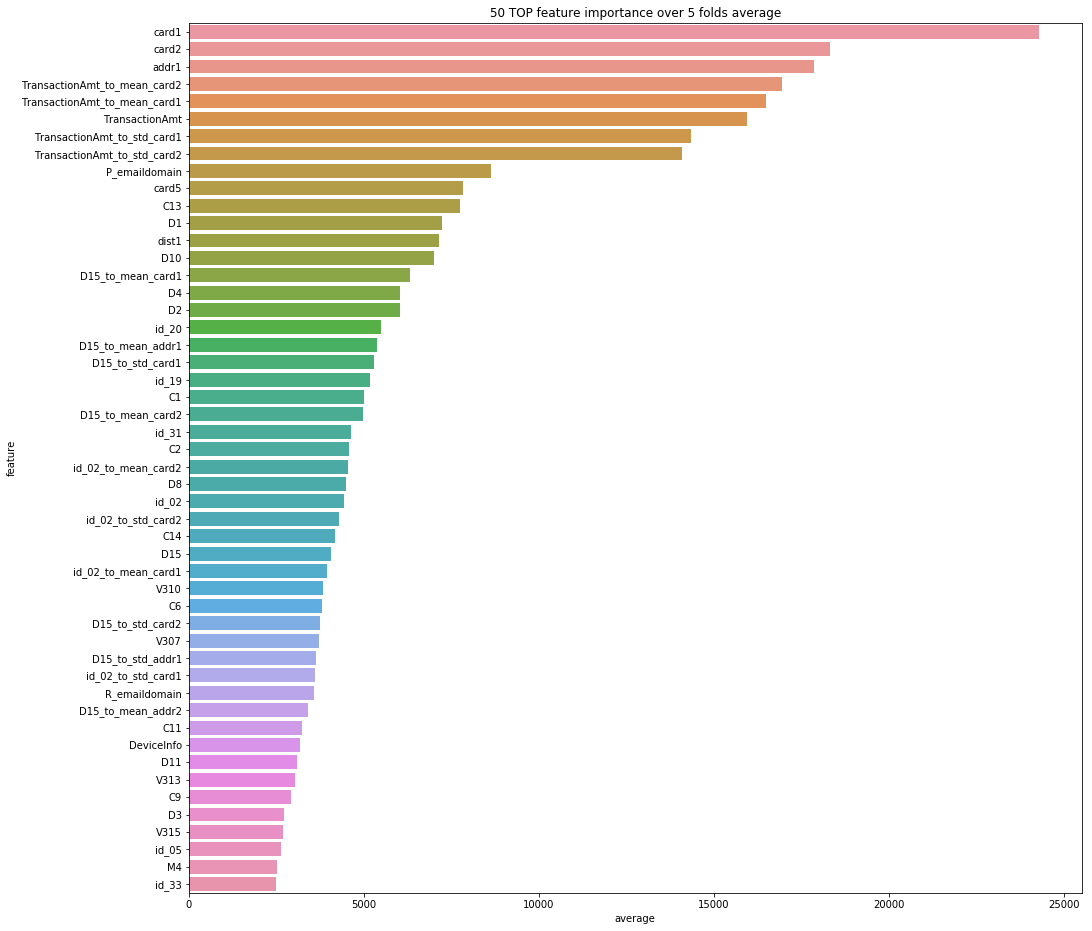

In [46]:
feature_importances['average'] = feature_importances[['fold_{}'.format(fold + 1) for fold in range(folds.n_splits)]].mean(axis=1)
feature_importances.to_csv('feature_importances.csv')

plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature');
plt.title('50 TOP feature importance over {} folds average'.format(folds.n_splits));










# feature_importances['average'] = feature_importances[[f'fold_{fold_n + 1}' for fold_n in range(folds.n_splits)]].mean(axis=1)
# feature_importances.to_csv('feature_importances.csv')

# plt.figure(figsize=(16, 16))
# sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature');
# plt.title('50 TOP feature importance over {} folds average'.format(folds.n_splits));

In [48]:
sub = pd.read_csv("D://Downloads//ieee-fraud-detection//sample_submission.csv")

In [49]:
sub['isFraud'] = y_preds
sub.to_csv("submission.csv", index=False)